<a href="https://colab.research.google.com/github/Kbcity1/checkpoint/blob/master/CWML_predicting_categorical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using machine learning model to predict categorical data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tele = pd.read_csv('/content/Telcom Churn.csv.xls')
tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
tele_copy = tele.copy()
tele_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
tele_copy.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
tele_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#dropping customerID column
tele_copy.drop('customerID', axis = 1, inplace = True)

In [ ]:
cat = tele_copy.select_dtypes(exclude = 'number')
num = tele_copy.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print('\nCategorical Data')
display(cat.head())

Numerical Data


,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70



Categorical Data


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [ ]:
#to convert TotalCharges column from categorical to numerical data
tele_copy['TotalCharges'].sample(200).values
tele_copy['TotalCharges'] = pd.to_numeric(tele_copy['TotalCharges'], errors = 'coerce')
tele_copy['TotalCharges'].dtypes

dtype('float64')

In [ ]:
tele_copy['TotalCharges'].std()

2266.7713618831453

In [ ]:
cat = tele_copy.select_dtypes(exclude = 'number')
num = tele_copy.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print('\nCategorical Data')
display(cat.head())

Numerical Data


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65



Categorical Data


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [ ]:
#checking for null values
tele_copy.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
#droping null values
tele_copy.dropna(inplace = True)
tele_copy.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
#scaling remeber we scale the data with the highest standard deviation data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

colsToScale = []
#scaling
for i in num.columns:
  if tele_copy[i].std() > 1000:
    colsToScale.append(i)
    scaler = StandardScaler()
    tele_copy[i] = scaler.fit_transform(tele_copy[[i]])
    joblib.dump(scaler, open(f'{i}_scaler.pkl', 'wb'))

#encoding
for i in cat.columns:
  encoder = LabelEncoder()
  tele_copy[i] = encoder.fit_transform(tele_copy[i])
  joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))

tele_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,-0.994194,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,-0.173740,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-0.959649,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,-0.195248,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-0.940457,1


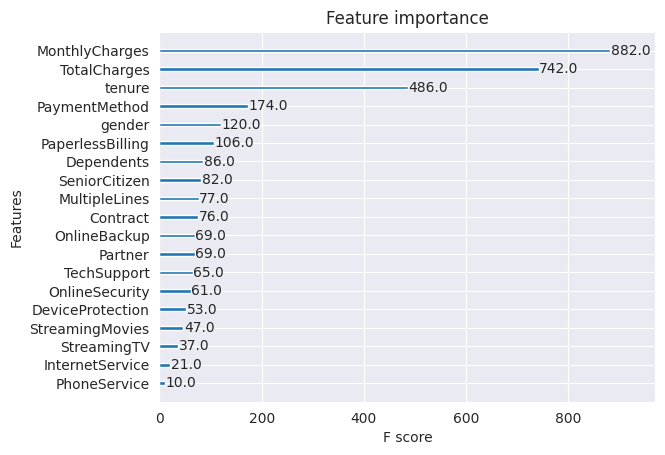

In [ ]:
#feature selection
from xgboost import XGBClassifier
import xgboost
featureSel = XGBClassifier()
x = tele_copy.drop('Churn', axis = 1)
y = tele_copy.Churn

featureSel.fit(x,y)
xgboost.plot_importance(featureSel, importance_type = 'weight')
plt.show()

In [ ]:
#creating a new dataframe with top 7 column + the y axis we want to predict
selectedCol = ['MonthlyCharges', 'TotalCharges', 'tenure', 'PaymentMethod', 'gender', 'PaperlessBilling', 'Dependents', 'OnlineSecurity', 'InternetService', 'Churn']
newTele = tele_copy[selectedCol]
newTele.head()

,MonthlyCharges,TotalCharges,tenure,PaymentMethod,gender,PaperlessBilling,Dependents,OnlineSecurity,InternetService,Churn
0,29.85,-0.994194,1,2,0,1,0,0,0,0
1,56.95,-0.173740,34,3,1,0,0,2,0,0
2,53.85,-0.959649,2,3,1,1,0,2,0,1
3,42.30,-0.195248,45,0,1,0,0,2,0,0
4,70.70,-0.940457,2,2,0,1,0,0,1,1


In [ ]:
#splitting into training and testing
from sklearn.model_selection import train_test_split
x = newTele.drop('Churn', axis = 1)
y = newTele.Churn

xtrain, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify= y)
print(f'xtrain shape: {xtrain.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

xtrain shape: (5625, 9)
x_test shape: (1407, 9)
y_train shape: (5625,)
y_test shape: (1407,)


In [ ]:
#here we concatinate
test = pd.concat([x_test, y_test], axis=1)
# Use xtrain instead of x_train
train = pd.concat([xtrain, y_train], axis=1)
print('Test Data')
display(test.head())
print('\nTrain Data')
display(train.head())

Test Data


,MonthlyCharges,TotalCharges,tenure,PaymentMethod,gender,PaperlessBilling,Dependents,OnlineSecurity,InternetService,Churn
6032,105.30,2.213151,68,2,1,1,0,0,1,1
7006,104.50,0.773644,40,1,1,1,0,0,1,1
5265,88.90,1.639805,66,0,0,1,0,0,1,0
4976,56.75,0.628736,66,1,1,1,1,0,0,0
6120,59.45,-0.849595,6,2,1,0,0,0,0,0



Train Data


,MonthlyCharges,TotalCharges,tenure,PaymentMethod,gender,PaperlessBilling,Dependents,OnlineSecurity,InternetService,Churn
2850,99.00,1.647659,60,2,1,1,0,0,1,0
5493,84.35,-0.797844,6,2,0,1,0,0,1,1
5054,54.45,0.613978,68,1,0,1,0,2,0,0
6941,50.70,0.355354,61,0,0,1,1,2,0,0
6991,95.65,-0.664076,8,0,0,0,0,0,1,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(xtrain, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report
# Use xtrain instead of x_train
prediction = model.predict(xtrain)
print(classification_report(y_train, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



In [ ]:
from sklearn.metrics import classification_report
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



<Axes: xlabel='Churn', ylabel='count'>

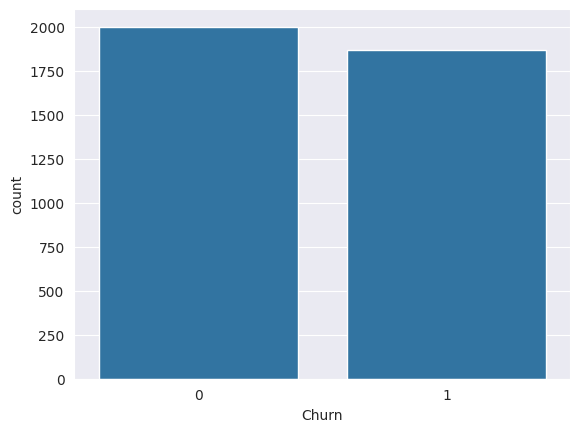

In [ ]:
#correcting the precision by undersampling
class0 = tele_copy.loc[tele_copy['Churn'] == 0]
class1 = tele_copy[tele_copy['Churn'] == 1]
class0 = class0.sample(2000)
newTele = pd.concat([class0, class1], axis = 0)
newTele.sample(10)

sns.countplot(x = newTele.Churn)

In [ ]:
x = newTele.drop('Churn', axis = 1)
y = newTele.Churn

xtrain, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify= y)

In [ ]:
#using a different() model
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(xtrain, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import classification_report
# Use xtrain instead of x_train
prediction = model.predict(xtrain)
print(classification_report(y_train, prediction))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1600
           1       0.93      0.98      0.95      1495

    accuracy                           0.96      3095
   macro avg       0.96      0.96      0.96      3095
weighted avg       0.96      0.96      0.96      3095



In [ ]:
from sklearn.metrics import classification_report
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       400
           1       0.71      0.72      0.71       374

    accuracy                           0.72       774
   macro avg       0.72      0.72      0.72       774
weighted avg       0.72      0.72      0.72       774

